In [51]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
path=r"C:\Users\HP\Downloads\db_PainelRioCovid.csv"

In [20]:
df=pd.read_csv(path)
df

,classificação_final,dt_notific,dt_inicio_sintomas,bairro_resid_estadia,ap_residencia_estadia,sexo,faixa_etaria,evolucao,dt_evolucao,raca_cor,Data_atualizacao,sistema
0,CONFIRMADO,09/22/2021,09/19/2021,BANGU,5.1,M,De 40 a 49,Recuperado,NaN,Parda,05/18/2023,ESUS
1,CONFIRMADO,01-11-2022,01-08-2022,ENCANTADO,3.2,F,De 20 a 29,Recuperado,NaN,Ignorado,05/18/2023,ESUS
2,CONFIRMADO,01/19/2022,01-11-2022,AGUA SANTA,3.2,F,De 40 a 49,Recuperado,NaN,Parda,05/18/2023,ESUS
3,CONFIRMADO,02-01-2022,01/13/2022,PRAÇA SECA,4,M,De 60 a 69,Recuperado,NaN,Parda,05/18/2023,ESUS
4,CONFIRMADO,01/17/2022,01/14/2022,MEIER,3.2,M,De 40 a 49,Recuperado,NaN,Ignorado,05/18/2023,ESUS
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,CONFIRMADO,11/13/2022,11-12-2022,SANTA CRUZ,5.3,F,De 40 a 49,Recuperado,NaN,Branca,05/18/2023,ESUS
1048571,CONFIRMADO,11-09-2022,11-06-2022,REALENGO,5.1,F,De 40 a 49,Recuperado,NaN,Parda,05/18/2023,ESUS
1048572,CONFIRMADO,11-09-2022,11-06-2022,GUARATIBA,5.2,F,De 40 a 49,Recuperado,NaN,Parda,05/18/2023,ESUS
1048573,CONFIRMADO,11/13/2022,11-11-2022,URCA,2.1,M,De 0 a 9,Recuperado,NaN,Ignorado,05/18/2023,ESUS


In [35]:
df['ap_residencia_estadia'].unique()

array(['5.1', '3.2', '4', 'Ignorado', '2.1', '5.2', '2.2', '3.1', '1',
       '3.3', '5.3'], dtype=object)

In [36]:
old_values = ['Ignorado']
new_values = [0.0]

df['ap_residencia_estadia']=df.ap_residencia_estadia.replace(old_values, new_values)

In [ ]:
# "dt_inicio_sintomas" : start_of_symptoms
# "bairro_resid_estadia" :neighbourhood_residency_stay
# "ap_residencia_estadia" :ap residence stay
# "faixa_etaria": age group
# "Recuperado" :retrieved
# "evolucao" :evolution
# "Data_atualizacao" :date updated
# "sistema":system
# df.drop(['dt_evolucao'], axis=1,inplace=True)
df.info()
df.dropna(inplace=True)


In [37]:
df['dt_notific'] = pd.to_datetime(df['dt_notific'])
df['dt_notific']= df['dt_notific'].dt.strftime('%m/%d/%Y')
df['dt_inicio_sintomas'] = pd.to_datetime(df['dt_inicio_sintomas']).dt.strftime('%m/%d/%Y')
df['bairro_resid_estadia'] = df['bairro_resid_estadia'].str.replace(" ", "_")

df['dt_notific'] = pd.to_datetime(df['dt_notific'])
df['week_notific'] = df['dt_notific'].dt.strftime('%Y%U').astype(int)

df['CAP_agregada'] = np.floor(pd.to_numeric(df['ap_residencia_estadia']))

CAP = df['CAP_agregada'].unique()
min_Date = pd.to_datetime("2019-12-31")
max_Date = pd.to_datetime('today')

df = df[(df['dt_notific'] >= min_Date) &(df['dt_notific'] <= max_Date)]

Tempo = pd.date_range(start=min(df['dt_notific'].dropna()),end=max(df['dt_notific'].dropna()), freq='D')
time_series = pd.DataFrame(np.zeros((len(Tempo), len(CAP))), index=Tempo, columns=CAP)

for cap in CAP:
    dados_diarios = df[ df['CAP_agregada'] == cap]
    Notificacoes_diarias = dados_diarios['dt_notific'].dropna()
    Notificacoes_por_dia = Notificacoes_diarias.value_counts().sort_index().reset_index()
    Notificacoes_por_dia.columns = ['Tempo', 'freq_dia']
    time_series[cap] = Notificacoes_por_dia.set_index('Tempo')['freq_dia'].reindex(Tempo, fill_value=0)

data_all_daily_RJ = time_series.loc['2020-03-12':]

In [46]:
data_all_daily_RJ


,5.0,3.0,4.0,0.0,2.0,1.0
2020-03-12,3,0,0,1,2,0
2020-03-13,0,0,0,0,1,0
2020-03-14,0,0,1,1,0,0
2020-03-15,0,0,1,1,0,0
2020-03-16,3,0,0,0,1,0
...,...,...,...,...,...,...
2023-05-13,6,7,4,2,4,1
2023-05-14,0,2,0,1,1,0
2023-05-15,19,16,3,3,8,3
2023-05-16,4,8,1,3,5,0


C:\Users\HP\AppData\Local\Temp\ipykernel_36500\800909024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all_daily_RJ[data_all_daily_RJ<0]=0
C:\Users\HP\AppData\Local\Temp\ipykernel_36500\800909024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all_daily_RJ[data_all_daily_RJ<0]=0


            5.0  3.0  4.0  0.0  2.0  1.0
2020-03-12    3    0    0    1    2    0
2020-03-13    0    0    0    0    1    0
2020-03-14    0    0    1    1    0    0
2020-03-15    0    0    1    1    0    0
2020-03-16    3    0    0    0    1    0
...         ...  ...  ...  ...  ...  ...
2023-05-13    6    7    4    2    4    1
2023-05-14    0    2    0    1    1    0
2023-05-15   19   16    3    3    8    3
2023-05-16    4    8    1    3    5    0
2023-05-17    1    8    4    1    5    0

[1162 rows x 6 columns]


TypeError: can only concatenate str (not "float") to str

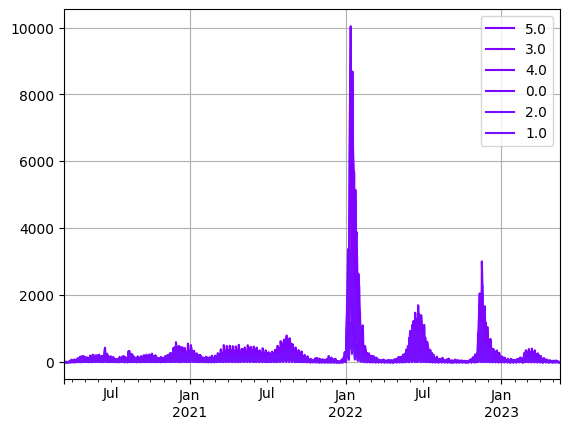

In [45]:
# Changing negative observations to 0 for data_all_daily_RJ
# for i in range(data_all_daily_RJ.shape[1]+1):
#     if (np.sum(data_all_daily_RJ.iloc[:, i] < 0) > 0):
#         data_all_daily_RJ.loc[data_all_daily_RJ.iloc[:, i] < 0, i] = 0
data_all_daily_RJ[data_all_daily_RJ<0]=0
print(data_all_daily_RJ)
# Plotting data_all_daily_RJ as xts objects
data_all_daily_RJ.plot(grid=True, title=None, color=[plt.cm.rainbow(i) for i in range(data_all_daily_RJ.shape[1])])

# Adding legend to the plot
plt.legend(loc="upper left", labels=["R," + col for col in data_all_daily_RJ.columns], linestyle='-', 
           colors=[plt.cm.rainbow(i) for i in range(data_all_daily_RJ.shape[1])])

plt.show()


In [69]:
Length_Time_Series = (1162)
prediction_range = 28
Training_Length = np.arange(1,1162-28 + 1)
Test_Length = np.arange(1162-28 + 1, 1162 + 1)


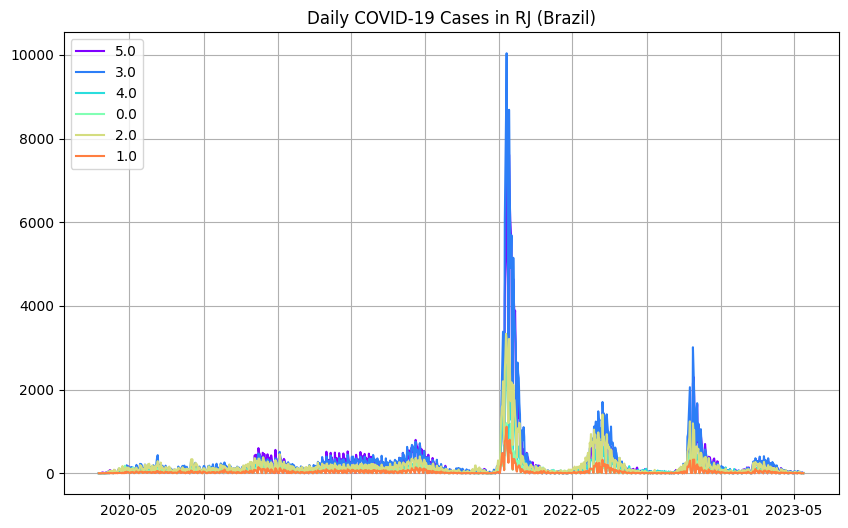

In [70]:

# Create a subsetting of data_all_daily_RJ based on Length_Time_Series
data_all_daily_RJ_subset = data_all_daily_RJ[0:Length_Time_Series]

# Plot the time series
plt.figure(figsize=(10, 6))
for i, col in enumerate(data_all_daily_RJ_subset.columns):
    plt.plot(data_all_daily_RJ_subset.index, data_all_daily_RJ_subset[col], label=col, color=plt.cm.rainbow(i / len(data_all_daily_RJ_subset.columns)))

plt.grid(True)
plt.title("Daily COVID-19 Cases in RJ (Brazil)")
plt.legend(loc="upper left")
plt.show()


IndexError: index 12 is out of bounds for axis 0 with size 12

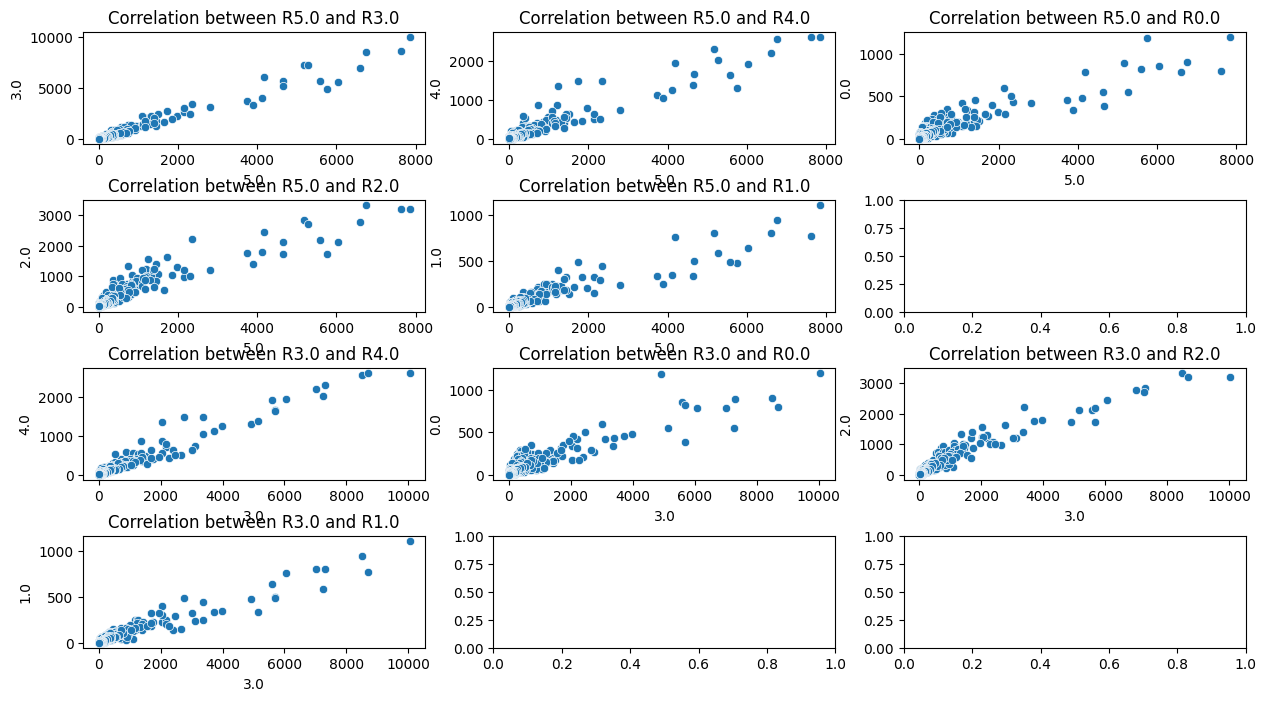

In [71]:
# Calculate correlation matrix
correlation_matrix = data_all_daily_RJ.iloc[:Length_Time_Series, :].corr()

# Create a grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(4, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5)

# Flatten the 2D array of subplots to easily access each subplot
axes_flat = axes.flatten()

# Plot correlation between each pair of regions
for i in range(data_all_daily_RJ.shape[1]):
    for j in range(i + 1, data_all_daily_RJ.shape[1]):
        # Exclude the diagonal (correlation with itself)
        if i != j:
            sns.scatterplot(
                x=data_all_daily_RJ.iloc[:Length_Time_Series, i],
                y=data_all_daily_RJ.iloc[:Length_Time_Series, j],
                ax=axes_flat[i * 5 + j -1 ],  # Assign subplot to each pair
            )
            axes_flat[i * 5 + j - 1].set_title(
                f"Correlation between R{data_all_daily_RJ.columns[i]} and R{data_all_daily_RJ.columns[j]}"
            )

# Remove any remaining empty subplots
for k in range(data_all_daily_RJ.shape[1] * 5 - 10, len(axes_flat)):
    fig.delaxes(axes_flat[k])

plt.show()


In [73]:
data_all = data_all_daily_RJ.iloc[:1162]
data_all_training = data_all_daily_RJ.iloc[1:1135]
data_all_test = data_all_daily_RJ.iloc[1135:1163]


In [74]:

# Assuming that data_all_training is a pandas DataFrame containing the training data
results_univariate_forecasting_ARIMA = pd.DataFrame({
    'method': [0] * data_all_training.shape[1],
    'rmse_in_sample': [0] * data_all_training.shape[1],
    'rmse_out_sample_4_weeks': [0] * data_all_training.shape[1],
    'rmse_out_sample_weekly': [0] * data_all_training.shape[1]
})

results_univariate_forecasting_ARIMA.index = data_all_training.columns


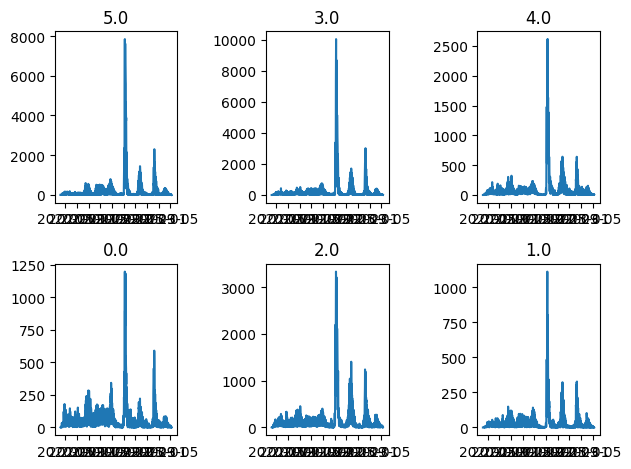

In [78]:

############### Running Models ###################
import random

random.seed(123)
import math
num_cols = math.ceil(data_all.shape[1] / 2)

# Create a multi-paneled plot with 2 rows and num_cols columns
fig, axes = plt.subplots(2, num_cols)

# Flatten the axes array to make it easier to work with
axes = axes.flatten()

# Now, you can plot on each individual axis as needed
for i, col in enumerate(data_all.columns):
    axes[i].plot(data_all[col])
    axes[i].set_title(col)

# Adjust the layout to avoid overlapping titles and axis labels
plt.tight_layout()

# Show the plot
plt.show()



C:\Users\HP\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible s

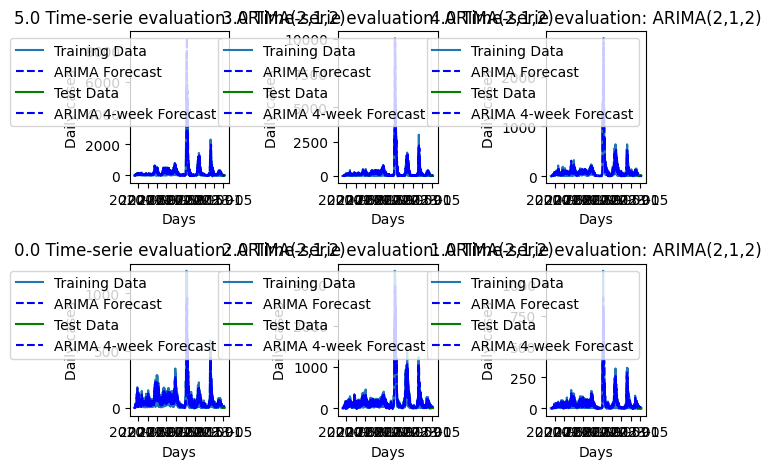

In [108]:
import statsmodels.api as sm


# Function to calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Calculate the number of columns needed for the subplot
num_cols = int(np.ceil(data_all_training.shape[1] / 2))

# Create a multi-paneled plot with 2 rows and num_cols columns
fig, axes = plt.subplots(2, num_cols)

# Flatten the axes array to make it easier to work with
axes = axes.flatten()

# Create an empty DataFrame to store the results
results_univariate_forecasting_ARIMA = pd.DataFrame(columns=["method", "rmse_in_sample", "rmse_out_sample_4_weeks", "rmse_out_sample_weekly"],index=data_all_training.columns)

# Loop through each column in data_all_training
for i, col in enumerate(data_all_training.columns):
    # Fit the ARIMA model
    ARIMA_Model = sm.tsa.ARIMA(data_all_training[col], order=(2, 1, 2)).fit()

    # Calculate RMSE for the out-of-sample forecast at different horizons
    rmse_arima_week_out_of_sample = []
    for week_index in range(4):
        start_index = (7 * week_index) + 1
        end_index = (7 * (week_index + 1))
        forecast_values = ARIMA_Model.forecast(steps=7)[0]
        rmse_arima_week_out_of_sample.append(rmse(forecast_values, data_all_test.iloc[start_index:end_index, i]))

    # Calculate other RMSE values
    rmse_in_sample = rmse(ARIMA_Model.fittedvalues, data_all_training[col])
    rmse_out_sample_4_weeks = rmse(ARIMA_Model.forecast(steps=(4 * 7))[0], data_all_test[col])
    rmse_out_sample_weekly = np.mean(rmse_arima_week_out_of_sample)

    # Store results in the DataFrame
    results_univariate_forecasting_ARIMA.loc[col] = ["ARIMA(" + str(2) + ",1," + str(2) + ")",round(rmse_in_sample, 1),round(rmse_out_sample_4_weeks, 1),round(rmse_out_sample_weekly, 1)]

    # Plot the time series and ARIMA model forecast
    axes[i].plot(data_all_training[col], label="Training Data")
    axes[i].plot(ARIMA_Model.fittedvalues, label="ARIMA Forecast", linestyle='dashed', color='blue')
    axes[i].plot(data_all_test[col], label="Test Data", color='green')
    forecast_index = pd.date_range(start=data_all_test.index[0], periods=prediction_range)
    axes[i].plot(forecast_index, ARIMA_Model.forecast(steps=prediction_range),label="ARIMA 4-week Forecast", linestyle='dashed', color='blue')
#     axes[i].plot(data_all_test.index, ARIMA_Model.forecast(steps=28)[0],label="ARIMA 4-week Forecast", linestyle='dashed', color='blue')
#     print(col)
    axes[i].set_title(str(col) + " Time-serie evaluation: ARIMA(" + str(2) + ",1," + str(2) + ")")
    axes[i].set_xlabel("Days")
    axes[i].set_ylabel("Daily cases")
    axes[i].legend()
plt.tight_layout()
plt.savefig('plots.png')
# Adjust the layout to avoid overlapping titles and axis labels


# # Show the plot
# plt.show()

# Clean up the ARIMA_Model and other variables
del ARIMA_Model, rmse_arima_week_out_of_sample


In [113]:
plt.figure(figsize=(12, 8))
mfrow = (2, int(np.ceil(data_all.shape[1] / 2)))
i = 1
prediction_range = 28
from statsmodels.tsa.arima.model import ARIMA

ARIMA_Model = ARIMA(data_all[:, i-1], order=(2, 1, 2))  # Replace p, d, and q with appropriate ARIMA orders
ARIMA_fit = ARIMA_Model.fit()
plt.subplot(mfrow[0], mfrow[1], i)

plt.plot(data_all[:, i-1], label="Original Data", color="black")
plt.plot(np.arange(Length_Time_Series, Length_Time_Series + prediction_range),
         ARIMA_fit.forecast(steps=prediction_range), label="ARIMA 4-week Forecast", linestyle='dashed', color='blue')
plt.fill_between(np.arange(Length_Time_Series, Length_Time_Series + prediction_range),
                 ARIMA_fit.forecast(steps=prediction_range).conf_int()[:, 0],
                 ARIMA_fit.forecast(steps=prediction_range).conf_int()[:, 1],
                 alpha=0.3, color='blue')
plt.title(colnames(data_all)[i-1] + " Time-serie evaluation: ARIMA(" + str(p) + "," + str(d) + "," + str(q) + ")")
plt.xlabel("Days")
plt.ylabel("Daily cases")
plt.legend()

plt.tight_layout()

plt.show()


InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1200x800 with 0 Axes>

In [90]:
ARIMA_Model.forecast(steps=prediction_range)

2023-04-21     9.593055
2023-04-22    -8.068445
2023-04-23    -8.117895
2023-04-24     5.236559
2023-04-25    21.049639
2023-04-26    29.587603
2023-04-27    27.664339
2023-04-28    18.908320
2023-04-29    10.025499
2023-04-30     6.181964
2023-05-01     8.387601
2023-05-02    13.912043
2023-05-03    18.762979
2023-05-04    20.297867
2023-05-05    18.427021
2023-05-06    15.051345
2023-05-07    12.484480
2023-05-08    12.015887
2023-05-09    13.411723
2023-05-10    15.416484
2023-05-11    16.724640
2023-05-12    16.747457
2023-05-13    15.780943
2023-05-14    14.621880
2023-05-15    13.986695
2023-05-16    14.116597
2023-05-17    14.752434
2023-05-18    15.404891
Freq: D, Name: predicted_mean, dtype: float64